# CMSE 202 Project
# Project
# CMSE 202



### Agenda 

</p>

1. [don't die](#ai)
1. [Do it](#github)
1. [See if this works](#groupwork)
1. [Test and cry](#projectplanning)
1. [Project work time](#projectwork)

### <p style="text-align: right;"> &#9989; **Burke** </p>
#### <p style="text-align: right;"> &#9989; Social 1</p>

-----
### WAR CORRELATES

https://correlatesofwar.org/

https://correlatesofwar.org/data-sets/

Terms and Conditions
By downloading a COW dataset, you agree to the following terms and conditions:

Data are not to be used for any commercial activity; users of COW data agree not to sell or use the data as part of any financial profit-making activity.
Users agree to cite each of the datasets they use in the manner described on each specific dataset web page.
Users agree not to distribute the dataset to any third party without written permission of the COW director and data host.
Users agree to ask permission for any dissemination, posting, or other use of the data that is not covered by the above restrictions.


## #1. COW War Data, 1816 – 2007 (v4.0)
### Sarkees, Meredith Reid and Frank Wayman (2010). Resort to War: 1816 – 2007. Washington DC: CQ Press.
Questions and Feedback
The inter-state and extra-state war data sets are hosted by Meredith Sarkees, Global Women’s Leadership in International Security, and Frank Wayman, University of Michigan-Dearborn. The intra-state war data sets are hosted by Meredith Sarkees and Jeffrey Dixon, Texas A&M-Central Texas. In case of questions, they may be contracted by email at sarkees@sbcglobal.net, fwayman@umich.edu, and jeffreydixon@tamuct.edu.

what is a state
what is a war


gdp
military_assets
religion
nationalism
ethnic variability

---
<a id="ai"></a>
## 1. COW Country Codes

[1] CSV with country codes that will be referenced frequently in COW data.  Will be synonymous with Nodes (Countries)

> 1. **Subtext:** this is subtext.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Country_Codes = pd.read_csv("COW-country-codes.csv")
Country_Codes.head()

,StateAbb,CCode,StateNme
0,USA,2,United States of America
1,CAN,20,Canada
2,BHM,31,Bahamas
3,CUB,40,Cuba
4,CUB,40,Cuba



&#9989; **Example 1.0**: Important code from Days 10&11 Graph Theory


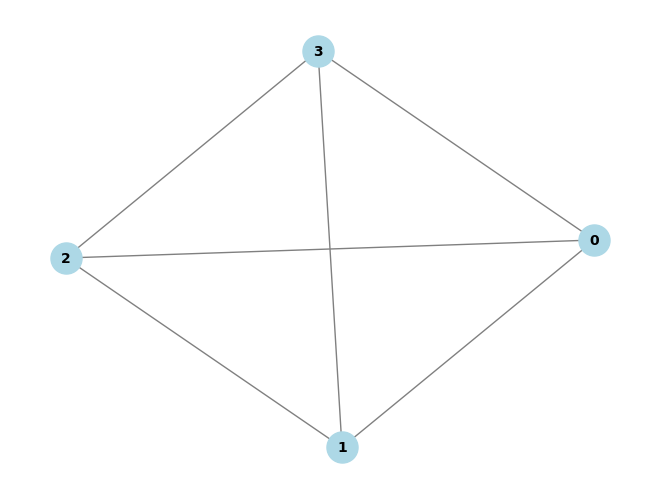

In [2]:
!pip install --user --upgrade decorator
import networkx as nx

# Put your code here
# Put your code here
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

adj_matrix = np.array([[0, 1, 1, 1],
                       [1, 0, 1, 1],
                       [1, 1, 0, 1],
                       [1, 1, 1, 0]])

G = nx.Graph(adj_matrix)

nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')

# Show the plot
plt.show()

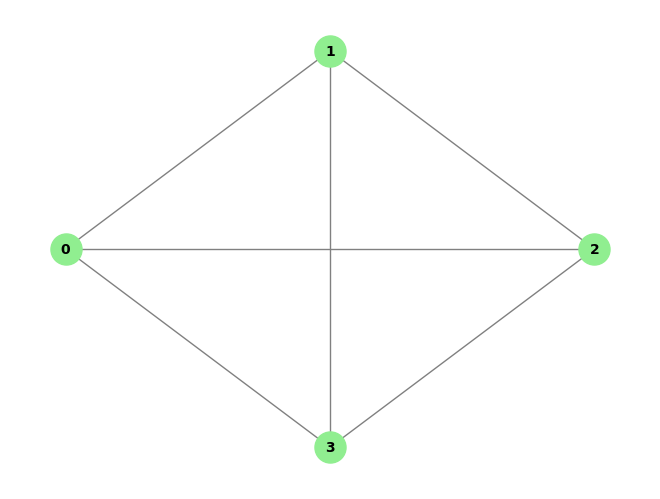

In [3]:
# Put your code here
positions = {
    0: (0, 1),  # Position for node 0
    1: (1, 2),  # Position for node 1
    2: (2, 1),  # Position for node 2
    3: (1, 0)   # Position for node 3
}

nx.draw(G, pos=positions, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold', edge_color='gray')

# Show the plot
plt.show()

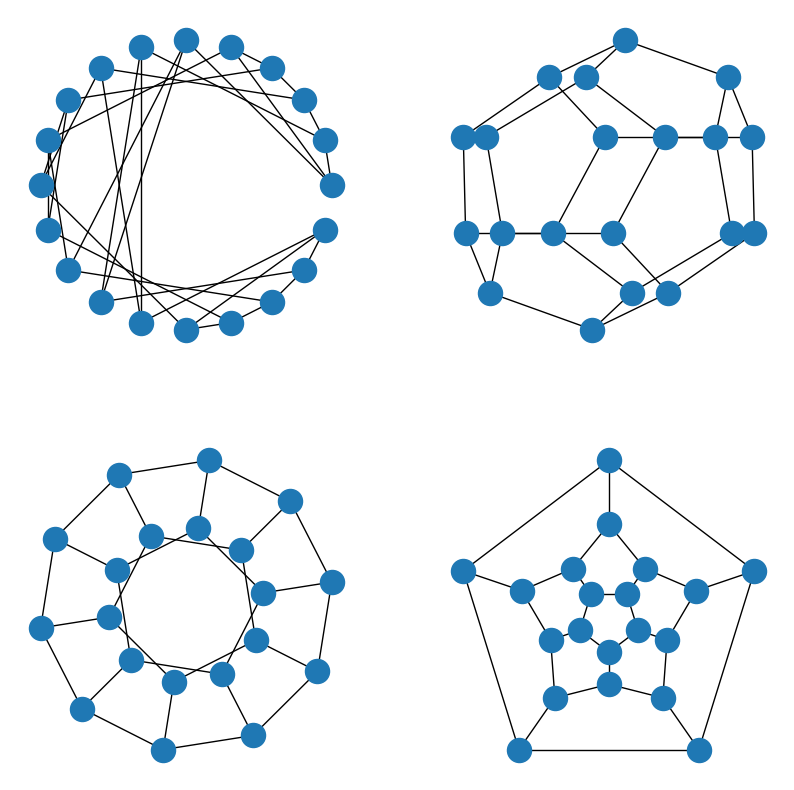

In [4]:
## Positions for a planar drawing called a Schlegel Diagram.
pos_dodecahedron = {0: (1.1888206453689418, 0.38627124296868426), 1: (7.654042494670958e-17, 1.25), 2: (-1.1888206453689418, 0.38627124296868437), 3: (-0.7347315653655916, -1.011271242968684), 4: (0.7347315653655911, -1.0112712429686845), 5: (0.7132923872213651, 0.23176274578121053), 6: (4.592425496802574e-17, 0.75), 7: (-0.7132923872213651, 0.23176274578121064), 8: (-0.4408389392193549, -0.6067627457812105), 9: (0.4408389392193547, -0.6067627457812107), 10: (-0.4755282581475768, -0.15450849718747364), 11: (-9.184850993605148e-17, -0.5), 12: (0.47552825814757677, -0.1545084971874738), 13: (0.2938926261462367, 0.4045084971874736), 14: (-0.29389262614623646, 0.40450849718747384), 15: (-0.2377641290737884, -0.07725424859373682), 16: (-4.592425496802574e-17, -0.25), 17: (0.23776412907378838, -0.0772542485937369), 18: (0.14694631307311834, 0.2022542485937368), 19: (-0.14694631307311823, 0.20225424859373692)}

nodes_dodecahedron = pos_dodecahedron.keys()
edges_dodecahedron = [(0,1), (1,2), (2,3), (3,4), (4,0),
                     (0,5), (1,6), (2,7), (3,8), (4,9),
                     (6,14), (14,7), (7,10), (10,8), (8,11),
                     (11,9), (9,12), (12,5), (5,13), (13,6),
                     (10,15), (11,16), (12,17), (13,18), (14,19),
                     (15,16), (16,17), (17,18), (18,19), (19,15)]

## You can also leave the arguemnt of the Graph() constructor empty
dodecahedron = nx.Graph()
## Then add nodes from a nodelist
dodecahedron.add_nodes_from(nodes_dodecahedron)
## Then add edges from an edgelist
dodecahedron.add_edges_from(edges_dodecahedron)

## Networkx offers different algorithms to decide how to draw a graph
## The different options can be found under 'layout'
pos1 = nx.layout.circular_layout(dodecahedron)
pos2 = nx.layout.spectral_layout(dodecahedron)
pos3 = nx.layout.kamada_kawai_layout(dodecahedron)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
nx.draw(dodecahedron, pos=pos1, ax=ax[0,0])
nx.draw(dodecahedron, pos=pos2, ax=ax[0,1])
nx.draw(dodecahedron, pos=pos3, ax=ax[1,0])
nx.draw(dodecahedron, pos=pos_dodecahedron, ax=ax[1,1])

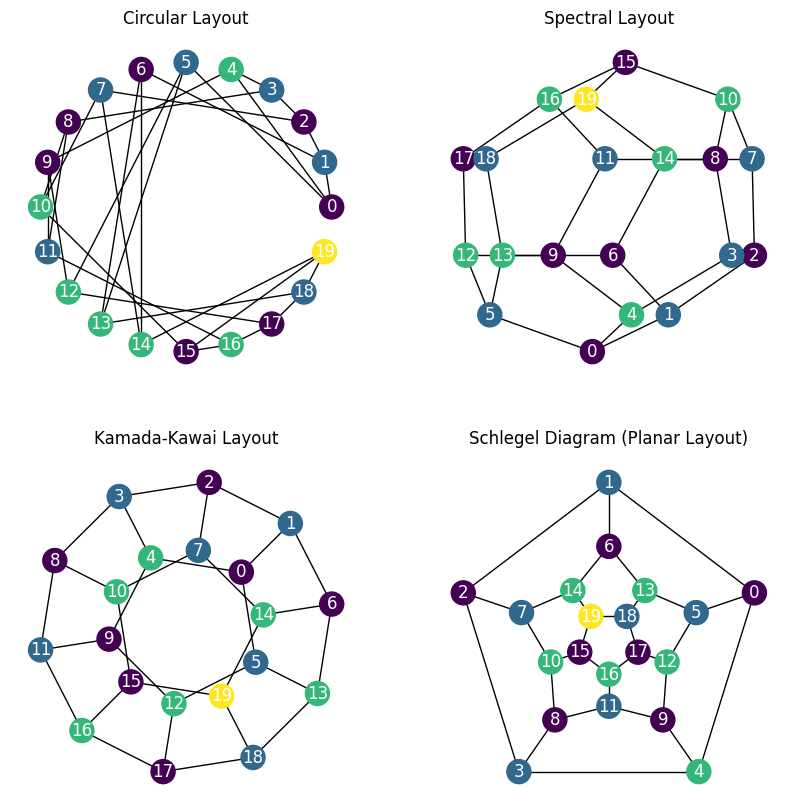

In [5]:
# Re-defining pos_dodecahedron variable
pos_dodecahedron = {0: (1.1888206453689418, 0.38627124296868426), 1: (7.654042494670958e-17, 1.25), 2: (-1.1888206453689418, 0.38627124296868437), 
                    3: (-0.7347315653655916, -1.011271242968684), 4: (0.7347315653655911, -1.0112712429686845), 5: (0.7132923872213651, 0.23176274578121053), 
                    6: (4.592425496802574e-17, 0.75), 7: (-0.7132923872213651, 0.23176274578121064), 8: (-0.4408389392193549, -0.6067627457812105), 
                    9: (0.4408389392193547, -0.6067627457812107), 10: (-0.4755282581475768, -0.15450849718747364), 11: (-9.184850993605148e-17, -0.5), 
                    12: (0.47552825814757677, -0.1545084971874738), 13: (0.2938926261462367, 0.4045084971874736), 14: (-0.29389262614623646, 0.40450849718747384), 
                    15: (-0.2377641290737884, -0.07725424859373682), 16: (-4.592425496802574e-17, -0.25), 17: (0.23776412907378838, -0.0772542485937369), 
                    18: (0.14694631307311834, 0.2022542485937368), 19: (-0.14694631307311823, 0.20225424859373692)}

nodes_dodecahedron = pos_dodecahedron.keys()
edges_dodecahedron = [(0,1), (1,2), (2,3), (3,4), (4,0),
                     (0,5), (1,6), (2,7), (3,8), (4,9),
                     (6,14), (14,7), (7,10), (10,8), (8,11),
                     (11,9), (9,12), (12,5), (5,13), (13,6),
                     (10,15), (11,16), (12,17), (13,18), (14,19),
                     (15,16), (16,17), (17,18), (18,19), (19,15)]

dodecahedron = nx.Graph()
dodecahedron.add_nodes_from(nodes_dodecahedron)
dodecahedron.add_edges_from(edges_dodecahedron)

node_map = nx.greedy_color(dodecahedron)
node_colors = list(node_map.values())

cmap = 'viridis'

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

nx.draw(dodecahedron, pos=nx.layout.circular_layout(dodecahedron), ax=ax[0, 0], node_color=node_colors, cmap=cmap, with_labels=True, font_color='white')
ax[0, 0].set_title("Circular Layout")

nx.draw(dodecahedron, pos=nx.layout.spectral_layout(dodecahedron), ax=ax[0, 1], node_color=node_colors, cmap=cmap, with_labels=True, font_color='white')
ax[0, 1].set_title("Spectral Layout")

nx.draw(dodecahedron, pos=nx.layout.kamada_kawai_layout(dodecahedron), ax=ax[1, 0], node_color=node_colors, cmap=cmap, with_labels=True, font_color='white')
ax[1, 0].set_title("Kamada-Kawai Layout")

nx.draw(dodecahedron, pos=pos_dodecahedron, ax=ax[1, 1], node_color=node_colors, cmap=cmap, with_labels=True, font_color='white')
ax[1, 1].set_title("Schlegel Diagram (Planar Layout)")

plt.show()

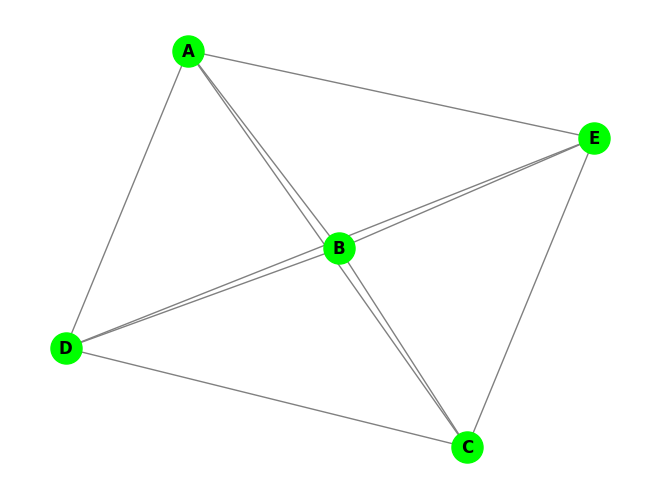

In [6]:
# Put your code here
import pandas as pd

labels = ['A', 'B', 'C', 'D', 'E']

adj_matrix_labeled = pd.DataFrame(
    [[0, 1, 1, 1, 1],
     [1, 0, 1, 1, 1],
     [1, 1, 0, 1, 1],
     [1, 1, 1, 0, 1],
     [1, 1, 1, 1, 0]],
    index=labels, columns=labels
)

G_labeled = nx.Graph(adj_matrix_labeled)

nx.draw(G_labeled, with_labels=True, node_color='lime', node_size=500, font_size=12, font_weight='bold', edge_color='gray')

plt.show()

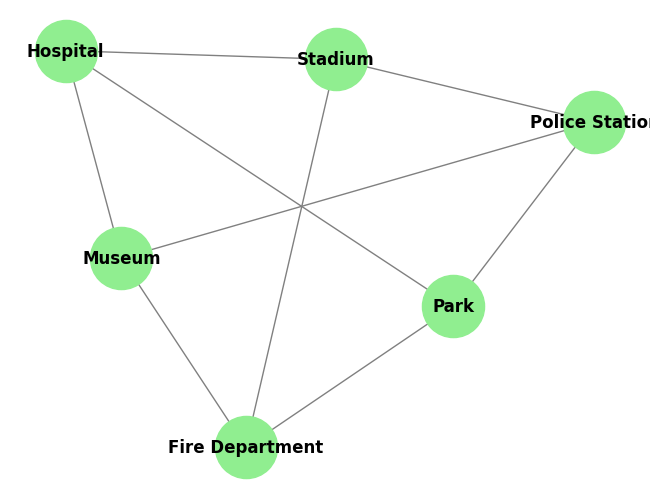

In [7]:
# Put your code here

city_graph = nx.Graph()

nodes = ["Park", "Stadium", "Museum", "Hospital", "Police Station", "Fire Department"]
city_graph.add_nodes_from(nodes)

edges = [("Park", "Hospital"), ("Park", "Police Station"), ("Park", "Fire Department"),
         ("Stadium", "Hospital"), ("Stadium", "Police Station"), ("Stadium", "Fire Department"),
         ("Museum", "Hospital"), ("Museum", "Police Station"), ("Museum", "Fire Department")]

city_graph.add_edges_from(edges)

pos = nx.spring_layout(city_graph) 


nx.draw(city_graph, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=12, font_weight='bold', edge_color='gray')
plt.show()

In [8]:
# Do This - Erase the contents of this cell and replace it with your answer to the above question!  
#(double-click on this text to edit this cell, and hit shift+enter to save the text)
import numpy as np
import pandas as pd
array = np.zeros((6,6)  , dtype='int')
array[1,4] = 1
array[2,4] = 1
array[4,5] = 1
array[2,5] = 1
array[3,5] = 1
array[4,1] = 1
array[4,2] = 1
array[5,4] = 1
array[5,2] = 1
array[5,3] = 1
array

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0]])

In [9]:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/TowersYYH730463QHM18572.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10526  100 10526    0     0   162k      0 --:--:-- --:--:-- --:--:--  163k


In [10]:
import pandas as pd
map = pd.read_csv("TowersYYH730463QHM18572.csv")
map.head()
map=map['latitude','longitude']
map.head()

KeyError: ('latitude', 'longitude')

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random as rand

def makeRandTowerMap(N):
    map = np.zeros((N,2),dtype=float)
    for i in range(N):
        x = rand.random()
        y = rand.random()
        map[i,0]=x
        map[i,1]=y
    return map
    

def plotMap(map,title="Randomly generated cell towers",xlab='longitude',ylab='latitude'):
    plt.scatter(map[:,0],map[:,1])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

# Function for computing the distance between two points
def distance(p1,p2):
    '''Returns the distance betwen two numpy points'''

    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
def nearestNeighbors(map):
    size =(len(map))
    adjacency_list = {}
    #enumerate
    for i, point in enumerate(map):
        nearest_distance = np.inf 
        nearest_index = None
        
        for j, other_point in enumerate(map):
            if i != j:  # Skip the same point, otherwise d always = 0
                dist = distance(point, other_point)
                if dist < nearest_distance:
                    nearest_distance = dist
                    nearest_index = j        
        adjacency_list[i] = nearest_index    
    return adjacency_list

def connectNeighbors(map,title="Randomly generated cell towers",xlab='longitude',ylab='latitude'):
    closests = nearestNeighbors(map)
    for val in map:
        plt.scatter(val[0], val[1], color = 'pink')

    for val in range(len(closests)):
        pnt_1 = val
        pnt_2 = closests[val]

        x_val = [map[pnt_1][0], map[pnt_2][0]]
        y_val = [map[pnt_1][1], map[pnt_2][1]]

        plt.plot(x_val, y_val, color = 'lightblue')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
print(map)
connectNeighbors(map)

In [ ]:
# Possible solution for the nearest-neighbor algorithm
import math
def distance(p1,p2):
    '''Returns the distance betwen two numpy points'''
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
def nearest_neighbors(points):
    '''Generates an adjacency list based on the Nearest neighbor graph algorithm.'''
    G = dict()
    for p in range(0,len(points)):
        min_distance = np.inf
        min_point = -1
        for n in range(0,len(points)):
            if p != n:
                d = distance(points[p], points[n])
                if d < min_distance:
                    min_distance = d
                    min_point = n
        if min_point == -1:
            print("ERROR-point not found")
        G[p] = [min_point]
    return G

In [ ]:
# Put your k-nn function here
def nearest_three_neighbors(points):
    '''Generates an adjacency list based on the Nearest neighbor graph algorithm.'''
    G = dict()
    dists = []
    for p in range(0,len(points)):
        min_distance3 = np.inf
        min_distance2 = np.inf
        min_distance1 = np.inf
        min_point = -1
        subdists = []
        for n in range(0,len(points)):
        
            if p != n:
                d = distance(points[p], points[n])
                #subdists.append(d)
                if d < min_distance1:
                    min_distance1 = d
                    min_point1 = n
                if d < min_distance2 and d > min_distance1:
                    min_distance2 = d
                    min_point2 = n
                if d < min_distance3 and d > min_distance2:
                    min_distance3 = d
                    min_point3 = n
        #print(min_distance1,min_distance2,min_distance3)
        if min_point1 == -1:
            print("ERROR-point not found")
        G[p] = [min_point1],[min_point2],[min_point3]
    return G

In [ ]:
# Put some testing code here
nearest_three_neighbors(map)

In [ ]:
# Put the code that makes your cell tower plot here
def connectThreeNeighbors(map,title="Randomly generated cell towers",xlab='longitude',ylab='latitude'):
    neighbors = nearest_three_neighbors(map)
    for val in map:
        plt.scatter(val[0], val[1], color = 'pink')

    for val in neighbors:

        pnt_1 = val
        pnt_2 = neighbors[val][0]
        pnt_3 = neighbors[val][1]
        pnt_4 = neighbors[val][2]
        
        x_val1 = [map[pnt_1][0], map[pnt_2][0][0]]
        y_val1 = [map[pnt_1][1], map[pnt_2][0][1]]

        x_val2 = [map[pnt_1][0], map[pnt_3][0][0]]
        y_val2 = [map[pnt_1][1], map[pnt_3][0][1]]

        x_val3 = [map[pnt_1][0], map[pnt_4][0][0]]
        y_val3 = [map[pnt_1][1], map[pnt_4][0][1]]

        plt.plot(x_val1, y_val1, color = 'lightblue')
        plt.plot(x_val2, y_val2, color = 'lightgreen')
        plt.plot(x_val3, y_val3, color = 'orange')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

connectThreeNeighbors(map)

<font size=+3>&#9998;</font> Coolio


-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University